In [1]:
import numpy as np
import pandas as pd
import seaborn; seaborn.set()
from pmdarima import auto_arima
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import matplotlib.pylab as plt

In [2]:
bitcoin_df = pd.read_csv('Resources/BTC/BTC-USD_Historical_Sept-2021.csv',index_col='Date', parse_dates= True)
bitcoin_df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-01,387.427002,411.697998,289.295990,338.321014,338.321014,902994450
2014-11-01,338.649994,457.092987,320.626007,378.046997,378.046997,659733360
2014-12-01,378.248993,384.037994,304.231995,320.192993,320.192993,553102310
2015-01-01,320.434998,320.434998,171.509995,217.464005,217.464005,1098811912
2015-02-01,216.867004,265.610992,212.014999,254.263000,254.263000,711518700


In [3]:
bitcoin_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
bitcoin_df = bitcoin_df.drop(columns=['Open','High','Low','Adj Close','Volume'])

In [5]:
bitcoin_df.head(10)

,Close
Date,
2014-10-01,338.321014
2014-11-01,378.046997
2014-12-01,320.192993
2015-01-01,217.464005
2015-02-01,254.263000
2015-03-01,244.223999
2015-04-01,236.145004
2015-05-01,230.190002
2015-06-01,263.071991


In [6]:
bitcoin_df.dtypes

Close    float64
dtype: object

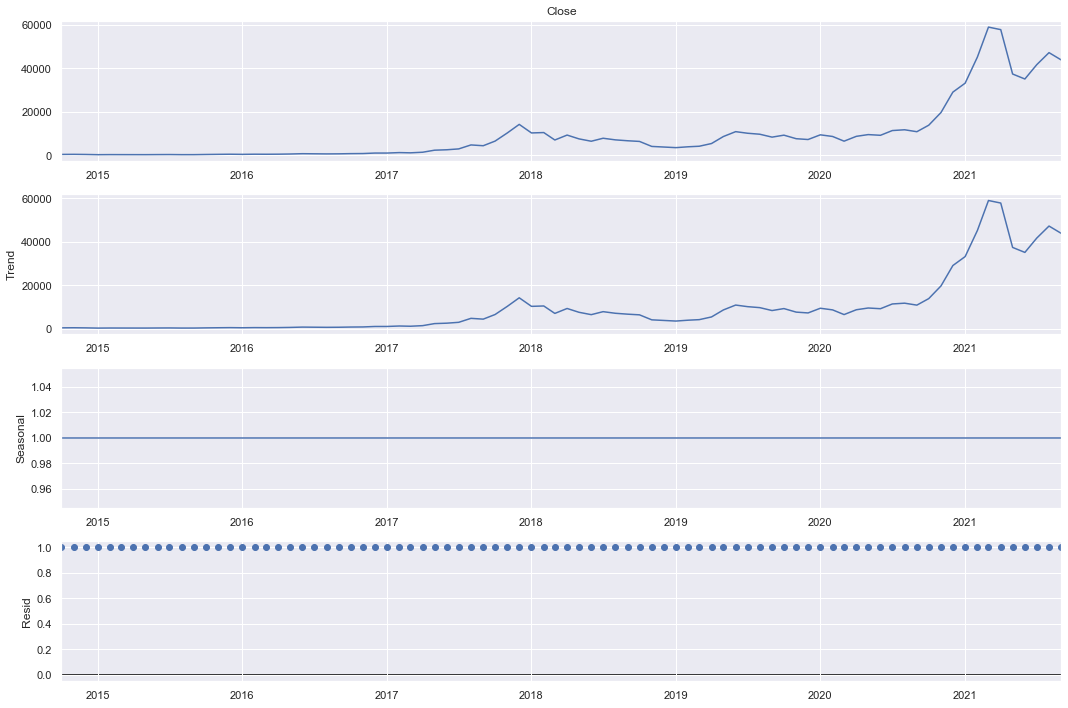

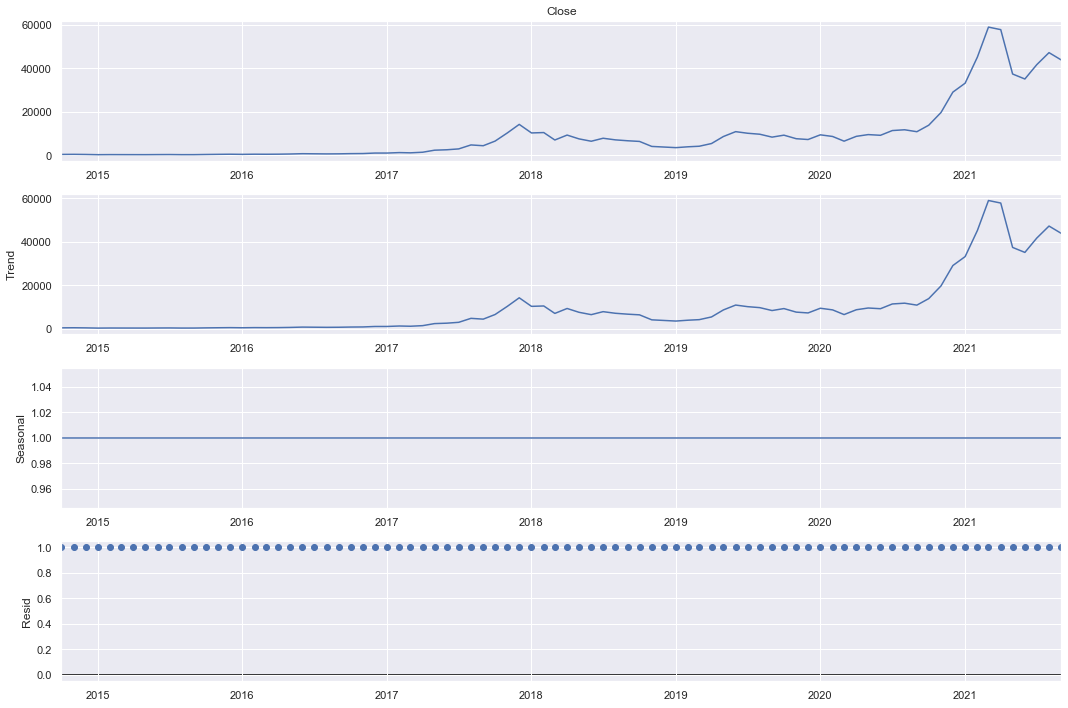

In [7]:
results = seasonal_decompose(bitcoin_df['Close'],model ='multiplicative',period=1)
plt.rcParams.update({'figure.figsize': (15,10)})
results.plot()

In [8]:
#Arima
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(bitcoin_df['Close'], start_p = 1, start_q = 1,
max_p = 3, max_q = 3, m = 12,
start_P = 0, seasonal = True,
d = None, D = 1, trace = True,
error_action ='ignore', # we don't want to know if an order does not work
suppress_warnings = True, # we don't want convergence warnings
stepwise = True)# set to stepwise

# To print the summary
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1377.579, Time=0.15 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1393.264, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1386.316, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1373.632, Time=0.23 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1382.730, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1374.334, Time=0.58 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1376.096, Time=0.23 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1379.189, Time=0.07 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1378.095, Time=0.25 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1389.293, Time=0.11 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1378.468, Time=0.11 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1382.959, Time=0.06 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1372.994, Time=0.44 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1385.479, Time=0.09 sec
 ARIMA(1,1,2)(1,1,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   84
Model:             SARIMAX(0, 1, 3)x(0, 1, [1, 2], 12)   Log Likelihood                -678.760
Date:                                 Sat, 11 Dec 2021   AIC                           1369.519
Time:                                         13:01:52   BIC                           1383.095
Sample:                                              0   HQIC                          1374.918
                                                  - 84                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5807      0.088      6.619      0.000       0.409       0.753
ma.L2         -0.1251      0.087     -1.437      0.151      -0.296       0.046
ma.L3         -0.3235      0.066     -4.900      0.000      -0.453      -0.194
ma.S.L12      -0.9876      0.271     -3.651      0.000      -1.518      -0.457
ma.S.L24       0.3229      0.193      1.675      0.094      -0.055       0.701
sigma2      1.118e+07   1.68e+06      6.638      0.000    7.88e+06    1.45e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                62.99
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):              41.74   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.63e+14. Standard errors may be unstable.
"""

In [9]:
# Split data into train / test sets
train = bitcoin_df.iloc[:len(bitcoin_df)-12]
test = bitcoin_df.iloc[len(bitcoin_df)-12:] # set one year(12 months) for testing

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Close'],
order = (0, 1, 1),
seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                   72
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -516.559
Date:                            Sat, 11 Dec 2021   AIC                           1043.119
Time:                                    13:01:53   BIC                           1053.506
Sample:                                10-01-2014   HQIC                          1047.174
                                     - 09-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0142      0.089      0.159      0.873      -0.161       0.189
ar.S.L12      -0.2661      0.208     -1.278      0.201      -0.674       0.142
ar.S.L24      -0.1290      0.198     -0.650      0.516      -0.518       0.260
ma.S.L12      -0.9425      0.210     -4.485      0.000      -1.354      -0.531
sigma2      1.765e+06    1.6e-07    1.1e+13      0.000    1.77e+06    1.77e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.39
Prob(Q):                              0.93   Prob(JB):                         0.30
Heteroskedasticity (H):              51.19   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.64e+28. Standard errors may be unstable.
"""

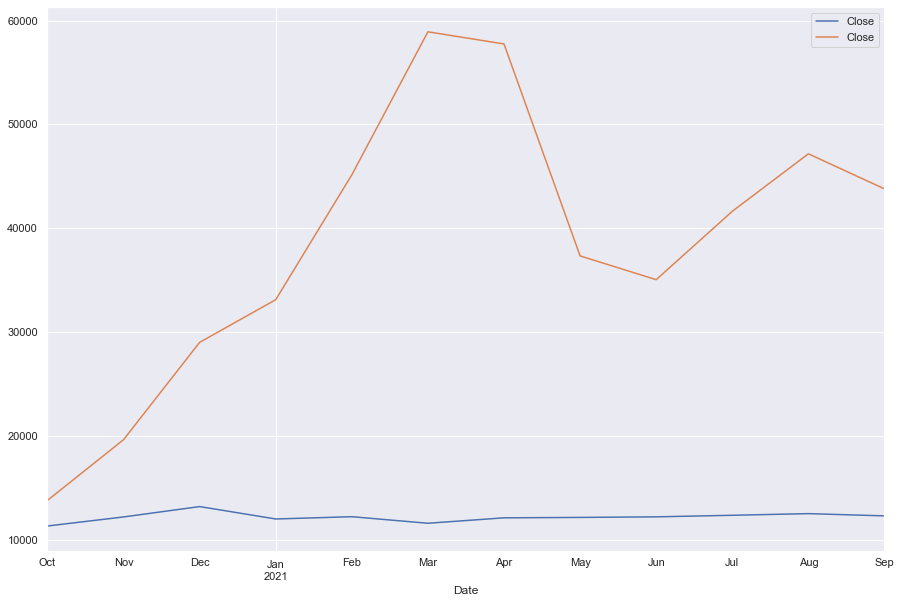

In [10]:
#Predictions of ARIMA Model agains the Test set
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,typ = 'levels').rename("Close")

# plot predictions and actual values
predictions.plot(legend = True)
test['Close'].plot(legend = True)


In [11]:
#Evaluate the model using MSE and RMSE
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["Close"], predictions)

29404.349244811292

In [12]:
# Calculate mean squared error
mean_squared_error(test["Close"], predictions)

864615754.5108343

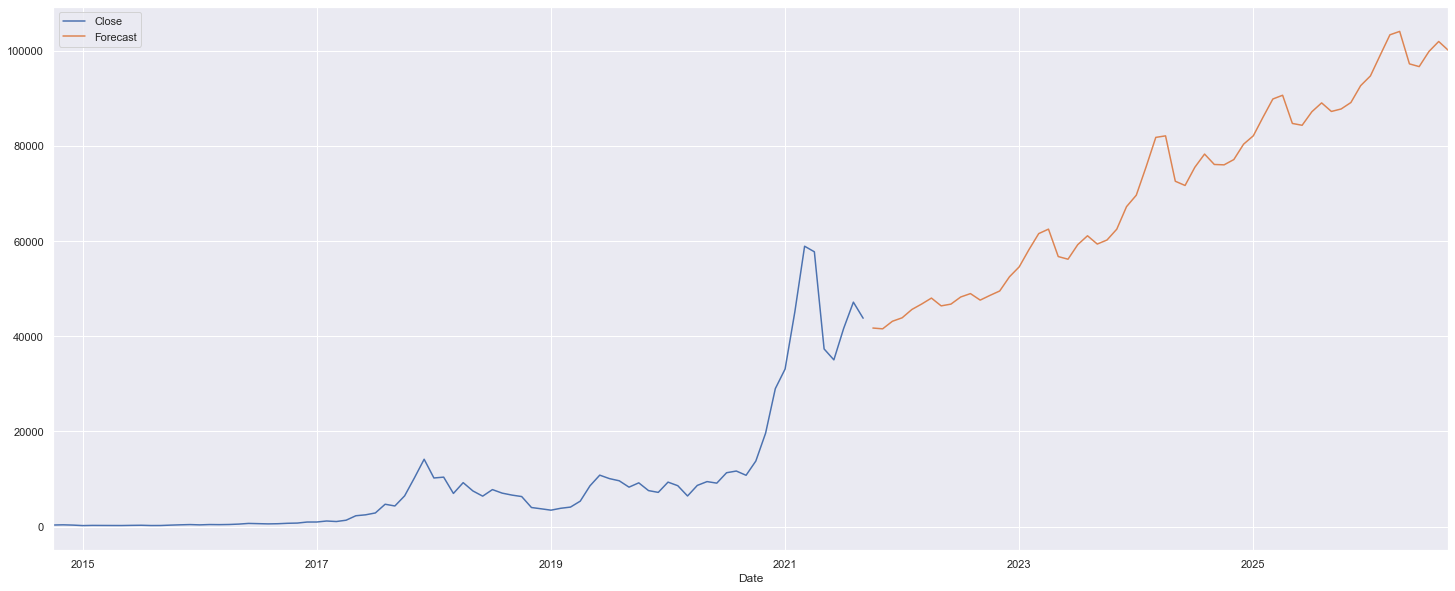

In [17]:
# Train the model on the full dataset
model = model = SARIMAX(bitcoin_df['Close'],order = (0, 1, 1),seasonal_order =(2, 1, 1, 12))
result = model.fit()

# Forecast for the next 5 years
forecast = result.predict(start = len(bitcoin_df),end = (len(bitcoin_df)-1) + 5 * 12,typ = 'levels').rename('Forecast')

# Plot the forecast values
bitcoin_df['Close'].plot(figsize = (25, 10), legend = True)
forecast.plot(legend = True)
